In [167]:
import numpy as np
import pandas as pd

In [168]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

Данные

In [169]:
file = 'geo.xlsx'
xl = pd.ExcelFile(file)
df1 = xl.parse('Sheet1')

In [170]:
df1.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [171]:
X_comment_class_true = df1[df1.comment_class==1].drop('comment_class', axis=1).values
X_comment_class_false = df1[df1.comment_class==-1].drop('comment_class', axis=1).values

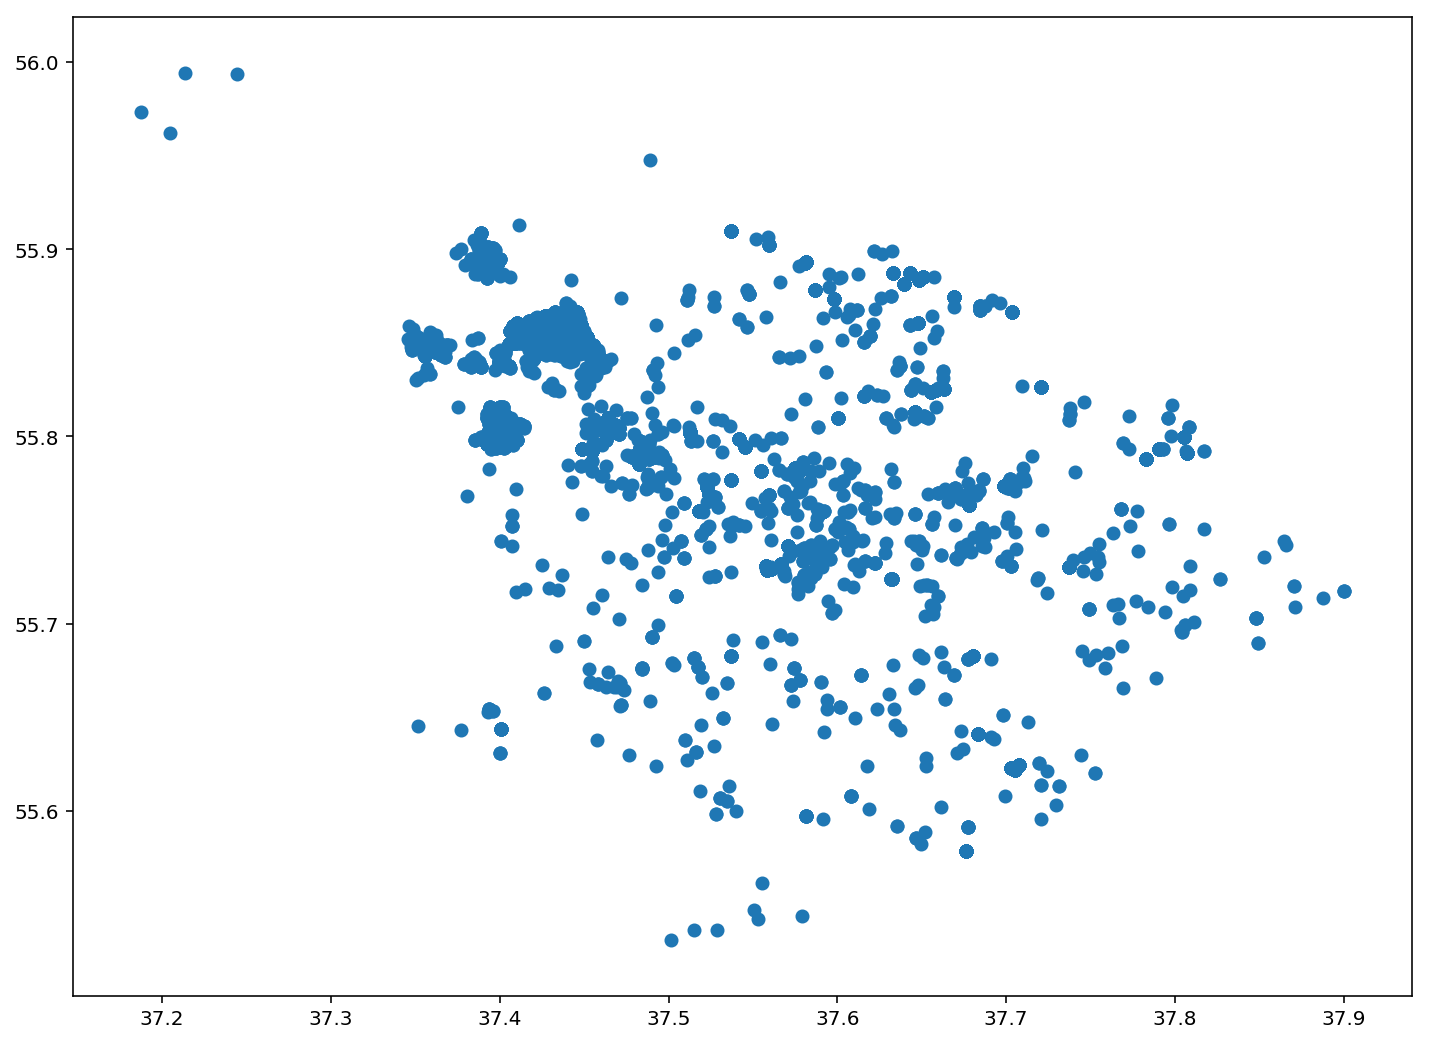

In [172]:
plt.figure(figsize=(12,9))
plt.scatter(X_comment_class_true[:,0],X_comment_class_true[:,1])
plt.show()

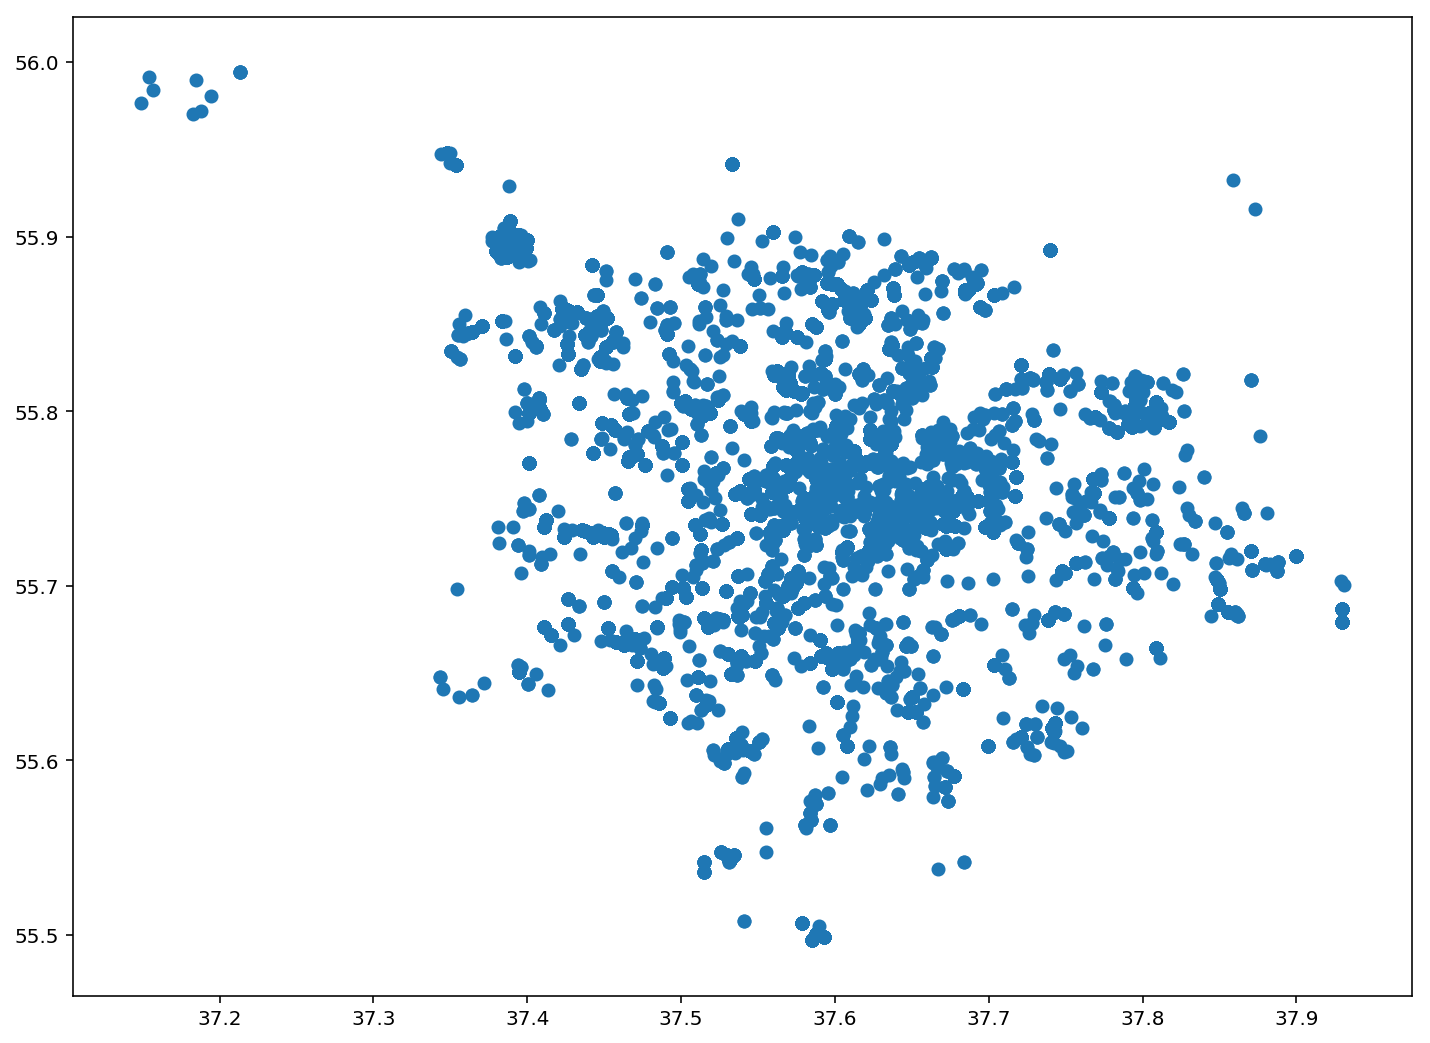

In [173]:
plt.figure(figsize=(12,9))
plt.scatter(X_comment_class_false[:,0],X_comment_class_false[:,1])
plt.show()

In [174]:
y = df1['comment_class'].values

In [175]:
#df1.pop('comment_class')
#X = df1.values
X = df1.drop('comment_class', axis=1).values
X

array([[37.612416, 55.777454],
       [37.612416, 55.777454],
       [37.603298, 55.742108],
       ...,
       [37.421066, 55.848756],
       [37.448509, 55.793065],
       [37.451249, 55.83662 ]])

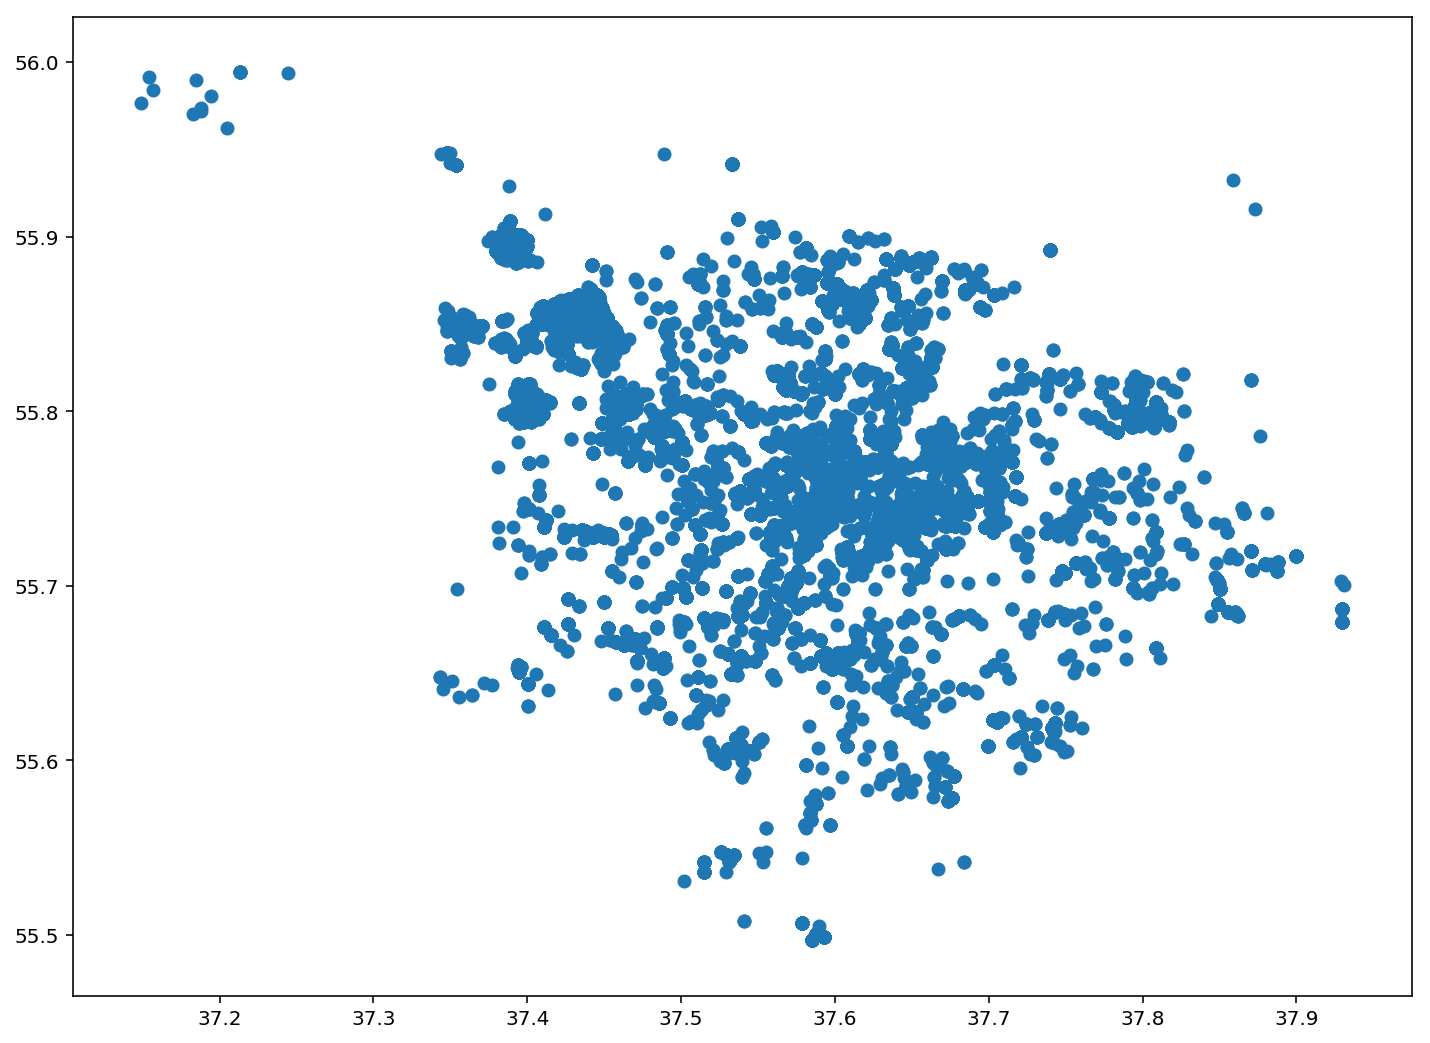

In [176]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,0],X[:,1])
plt.show()

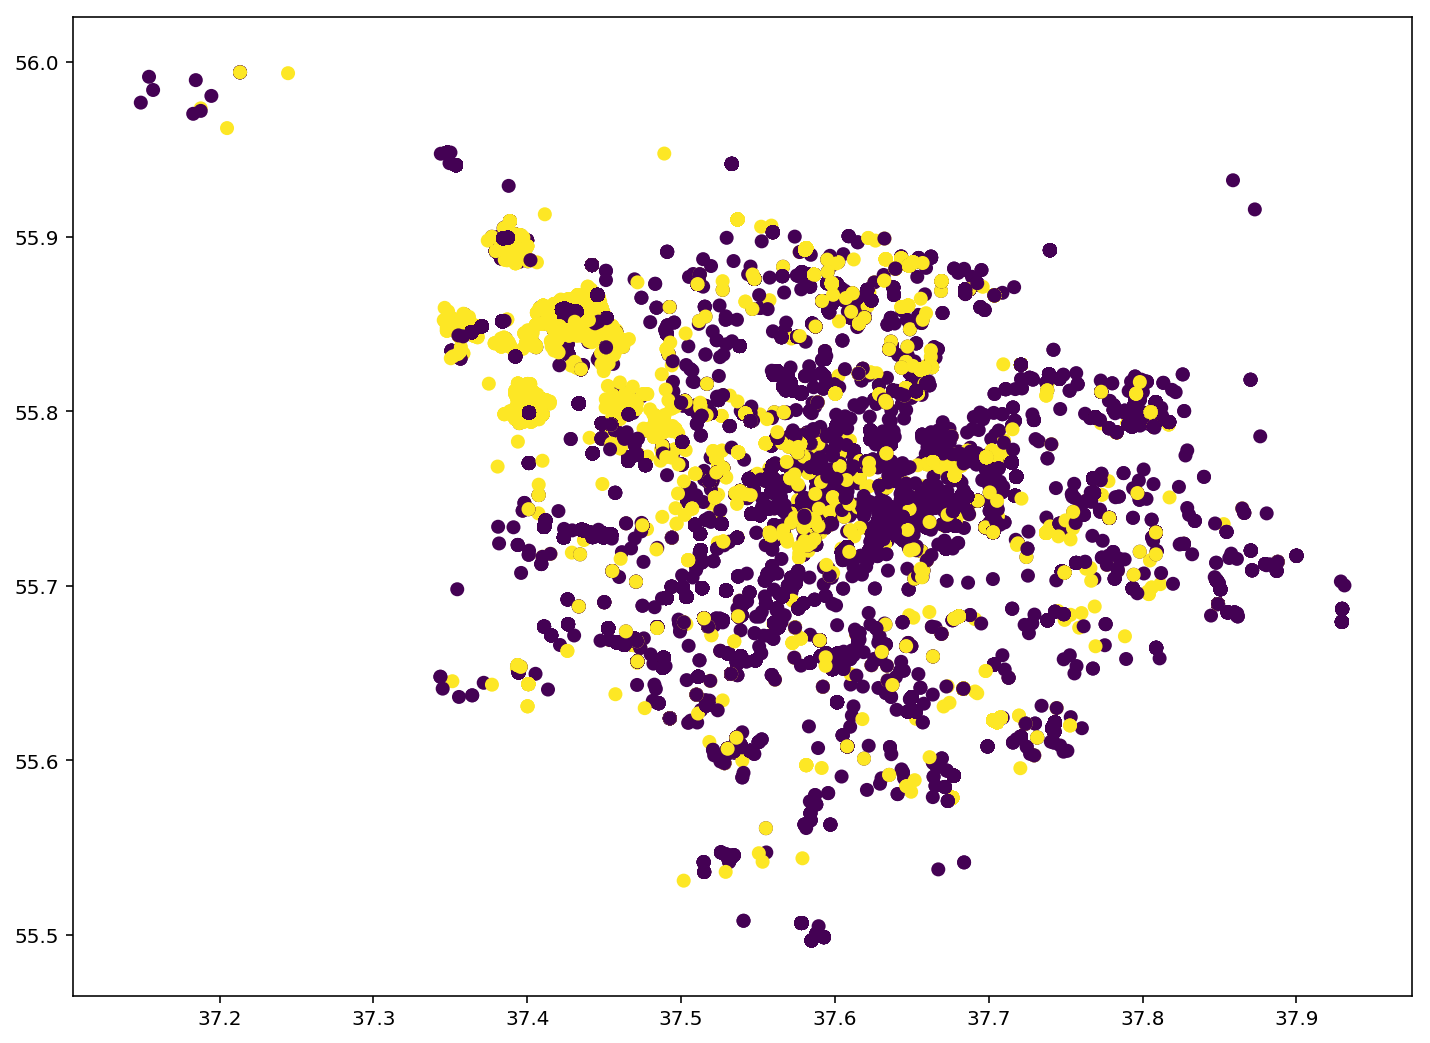

In [177]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()

In [180]:
X_scaled_comment_class_true = scaler.fit_transform(X_comment_class_true)

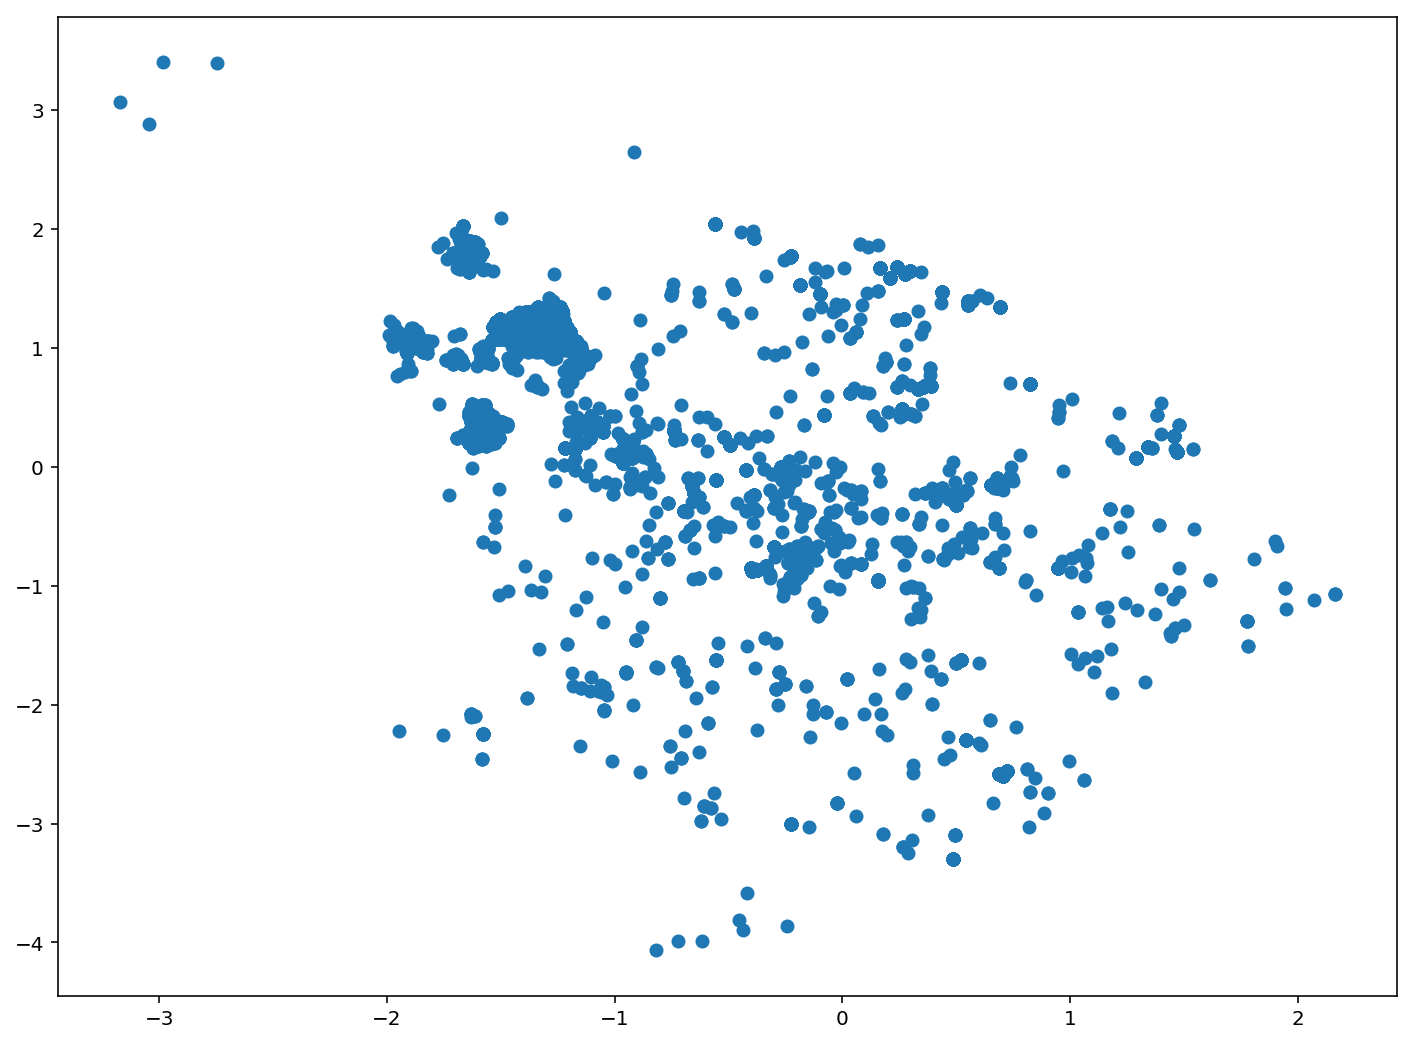

In [181]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled_comment_class_true[:, 0], X_scaled_comment_class_true[:, 1])
plt.show()

In [182]:
X_scaled_comment_class_false = scaler.fit_transform(X_comment_class_false)

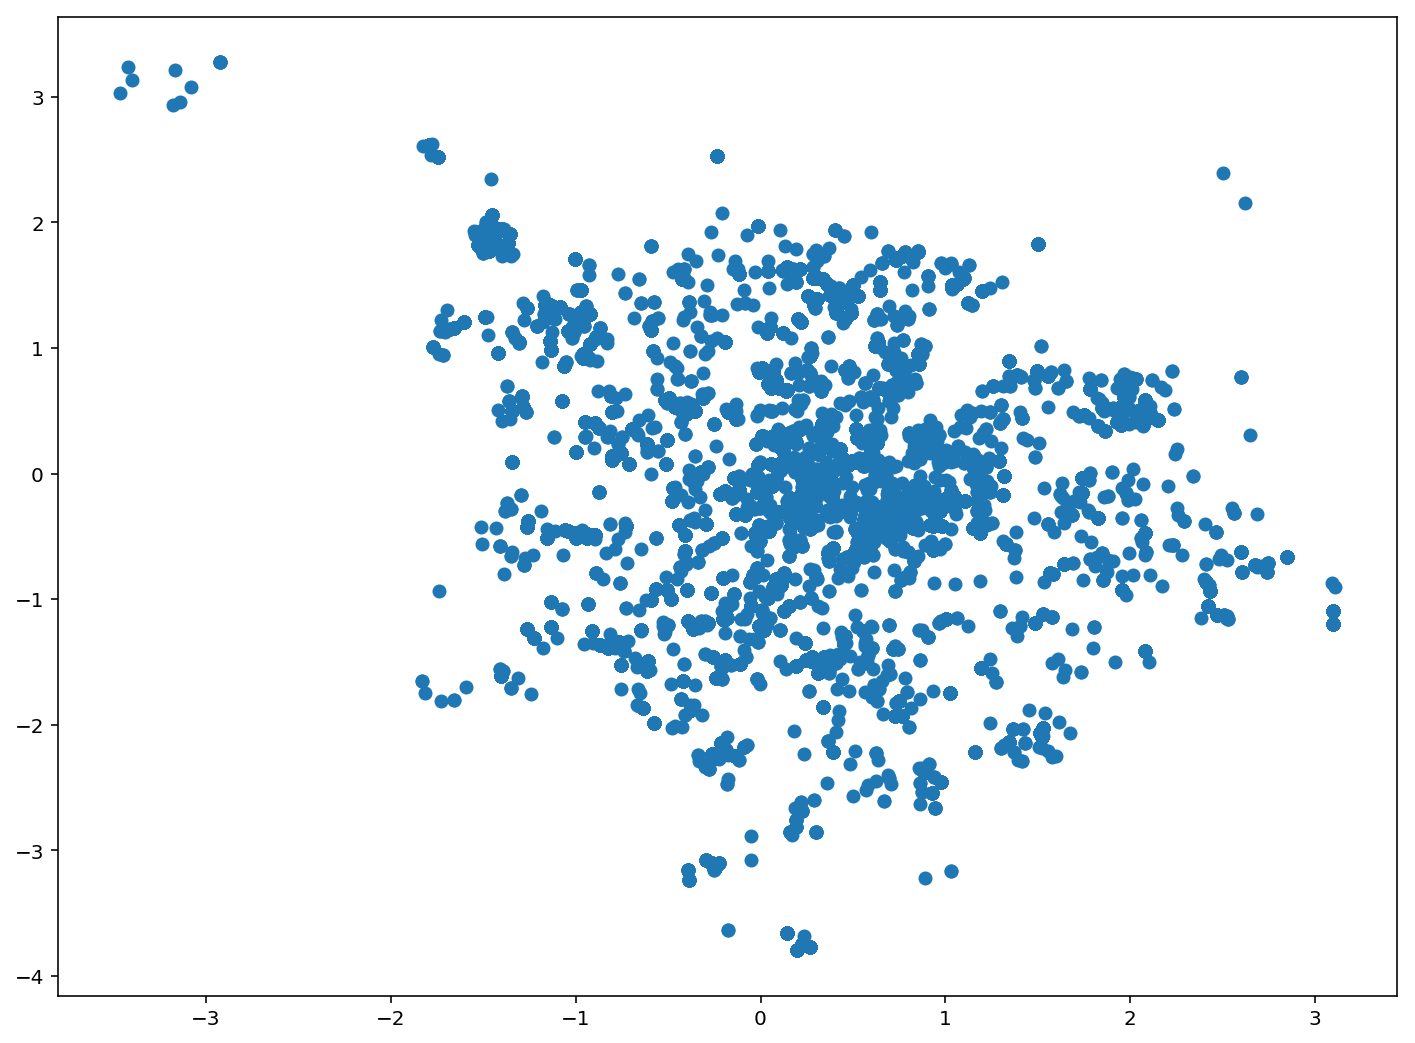

In [183]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled_comment_class_false[:, 0], X_scaled_comment_class_false[:, 1])
plt.show()

In [184]:
X_scaled = scaler.fit_transform(X)

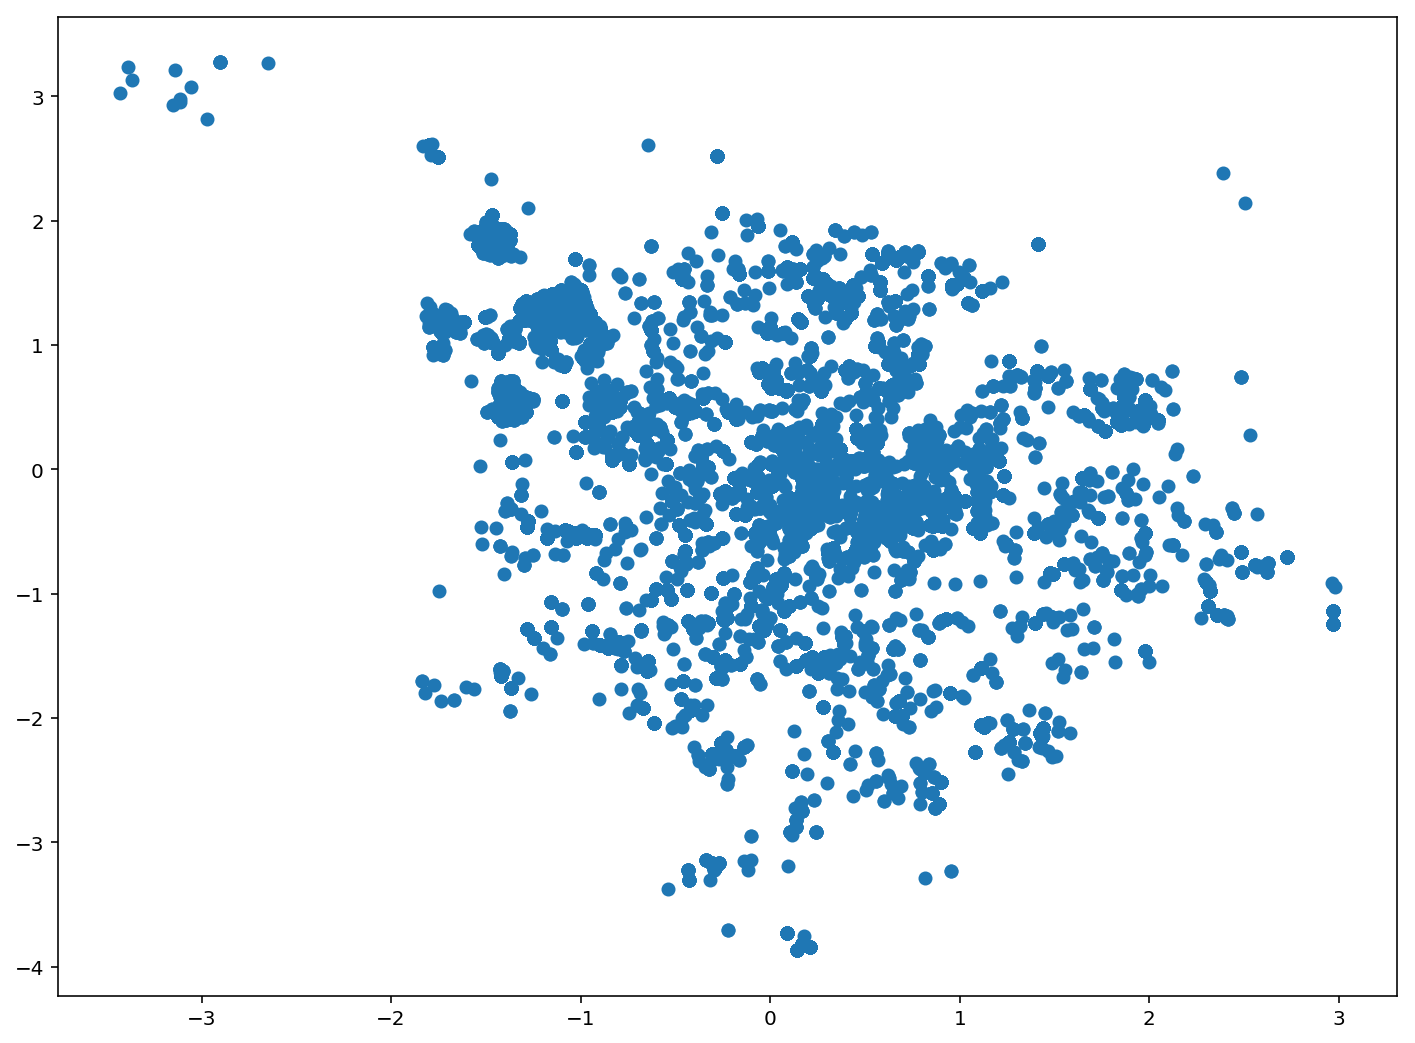

In [185]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.show()


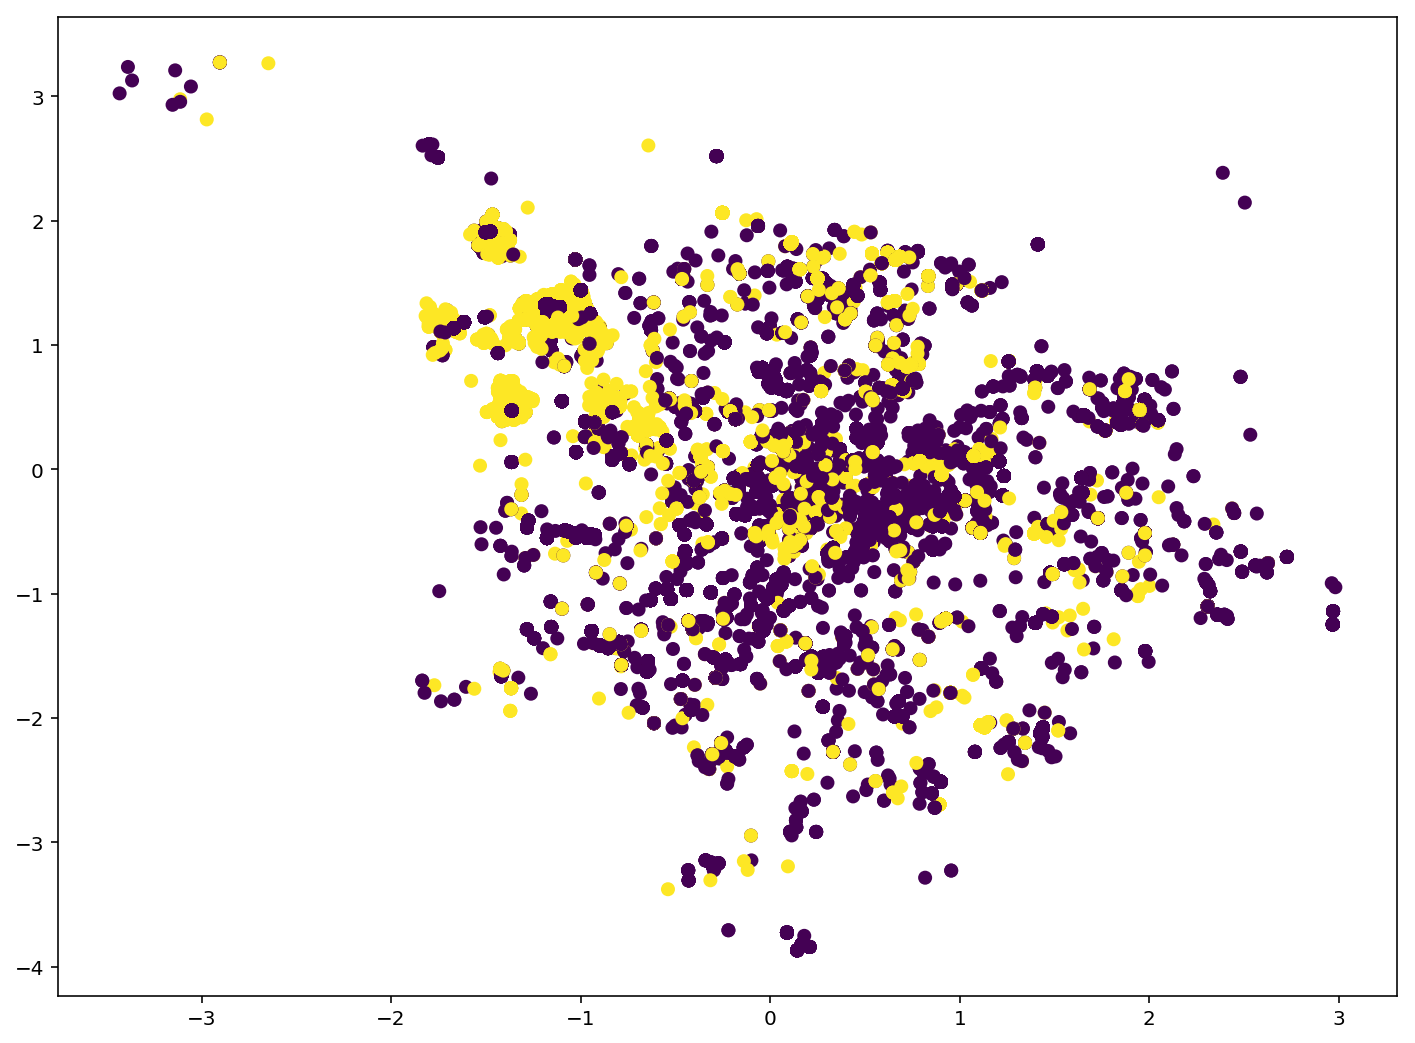

In [186]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= y)
plt.show()

Кластеризация

In [187]:
from sklearn.cluster import KMeans


In [188]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

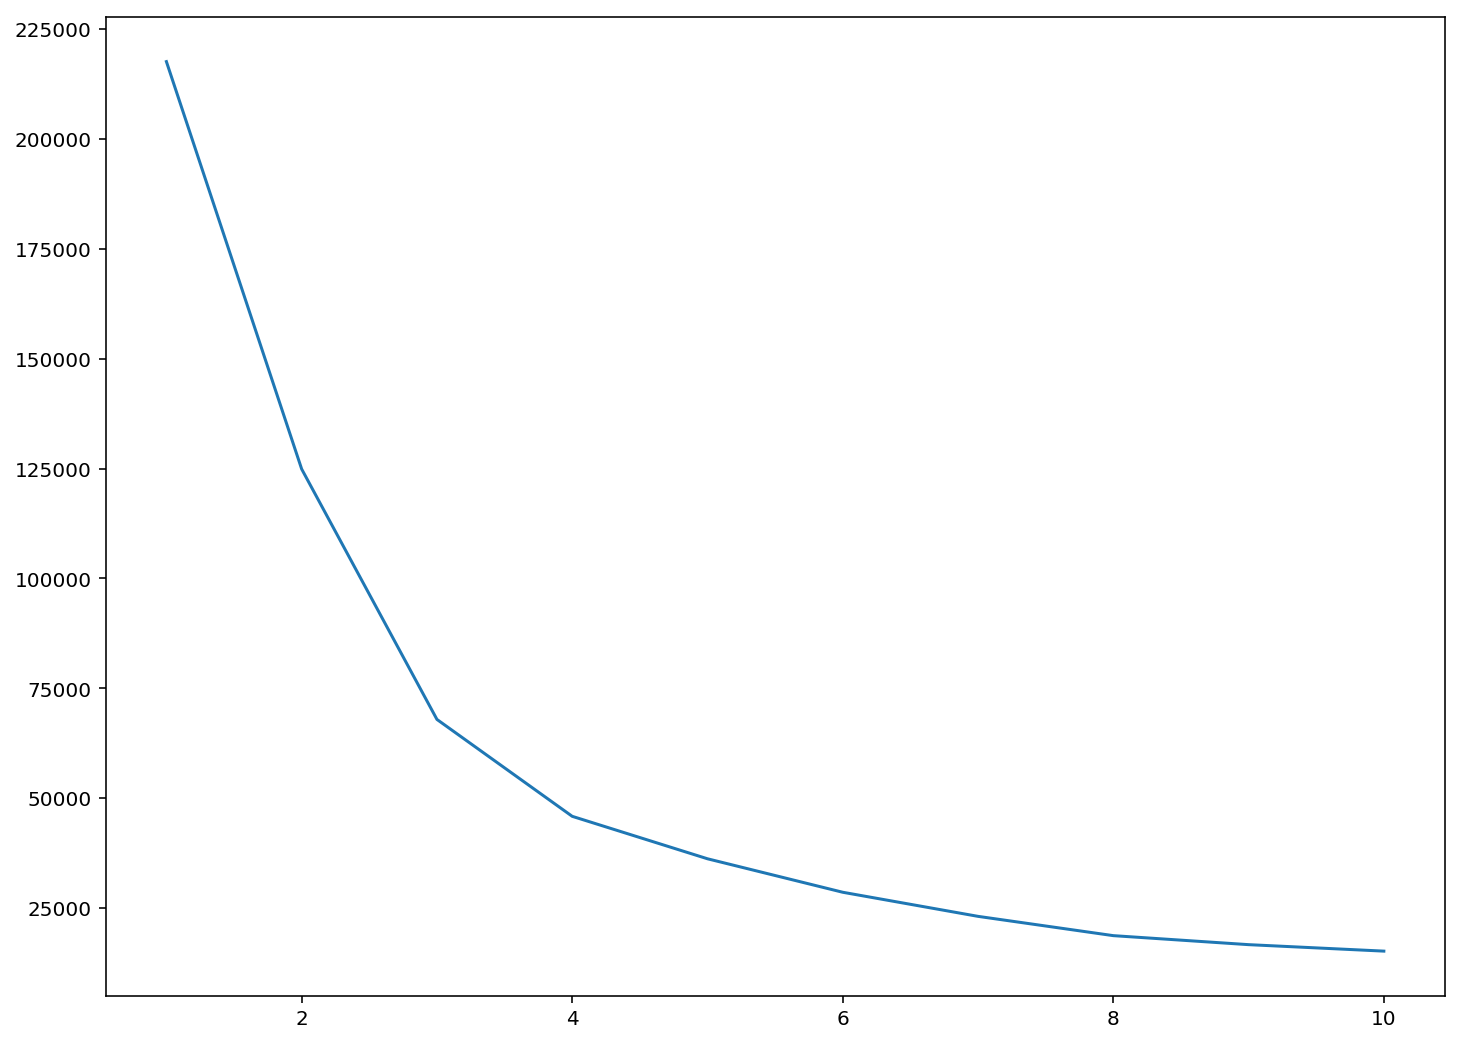

In [189]:
plt.plot(ks, k_inertia)

In [190]:
diff = np.diff(k_inertia)

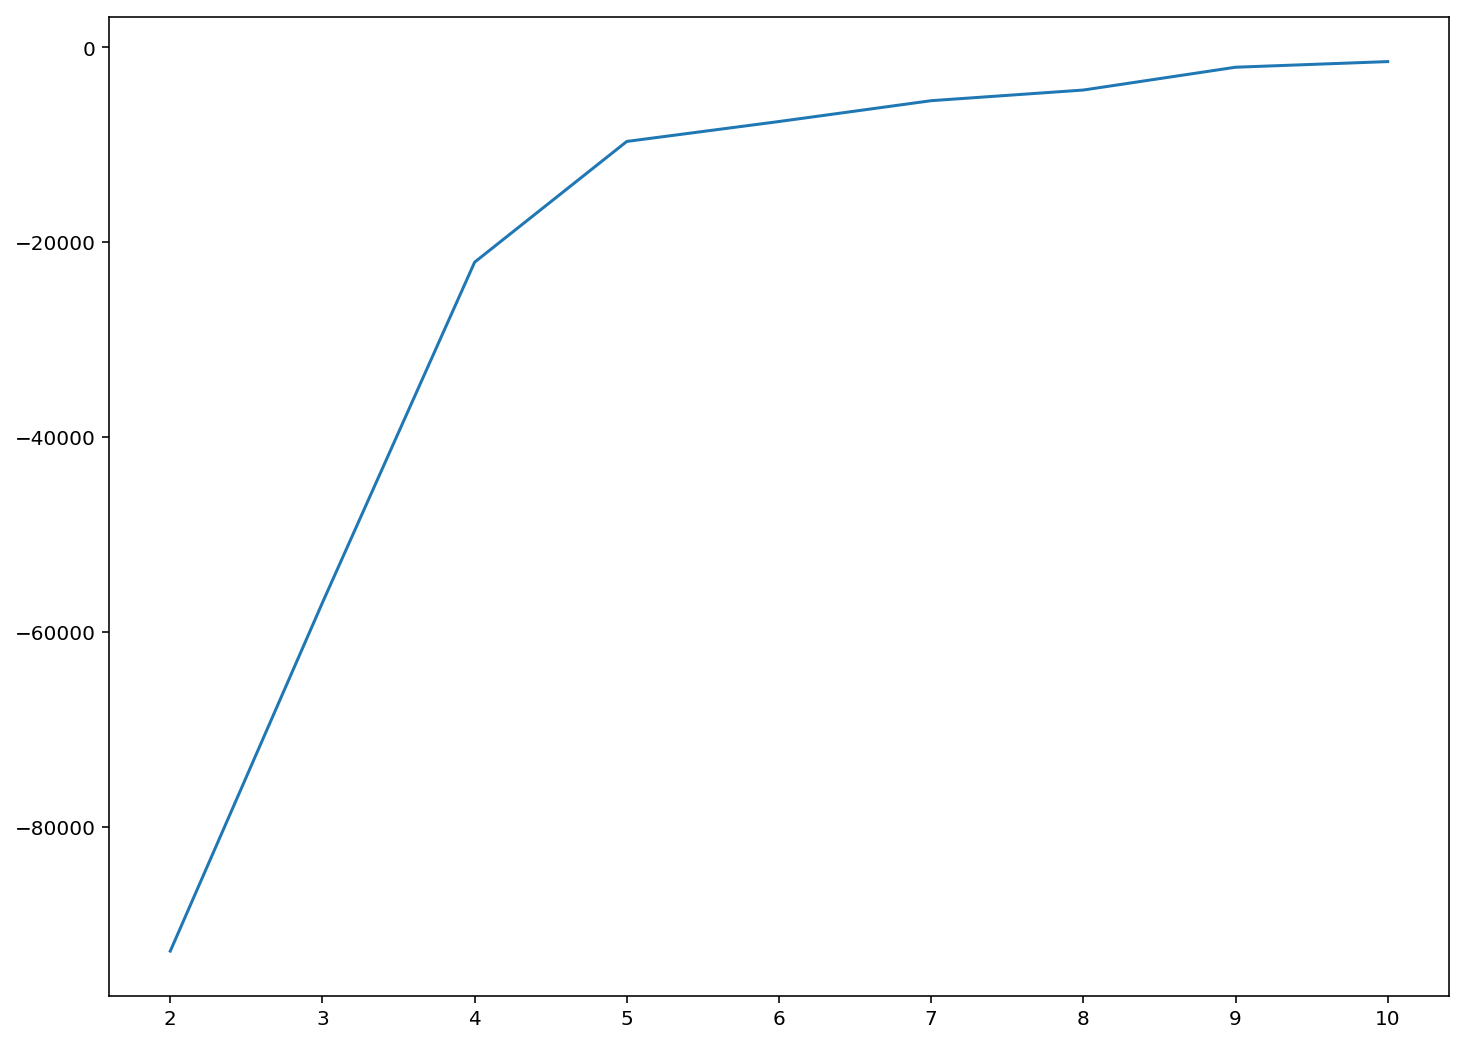

In [191]:
plt.plot(ks[1:], diff)

In [192]:
diff_r = diff[1:] / diff[:-1]

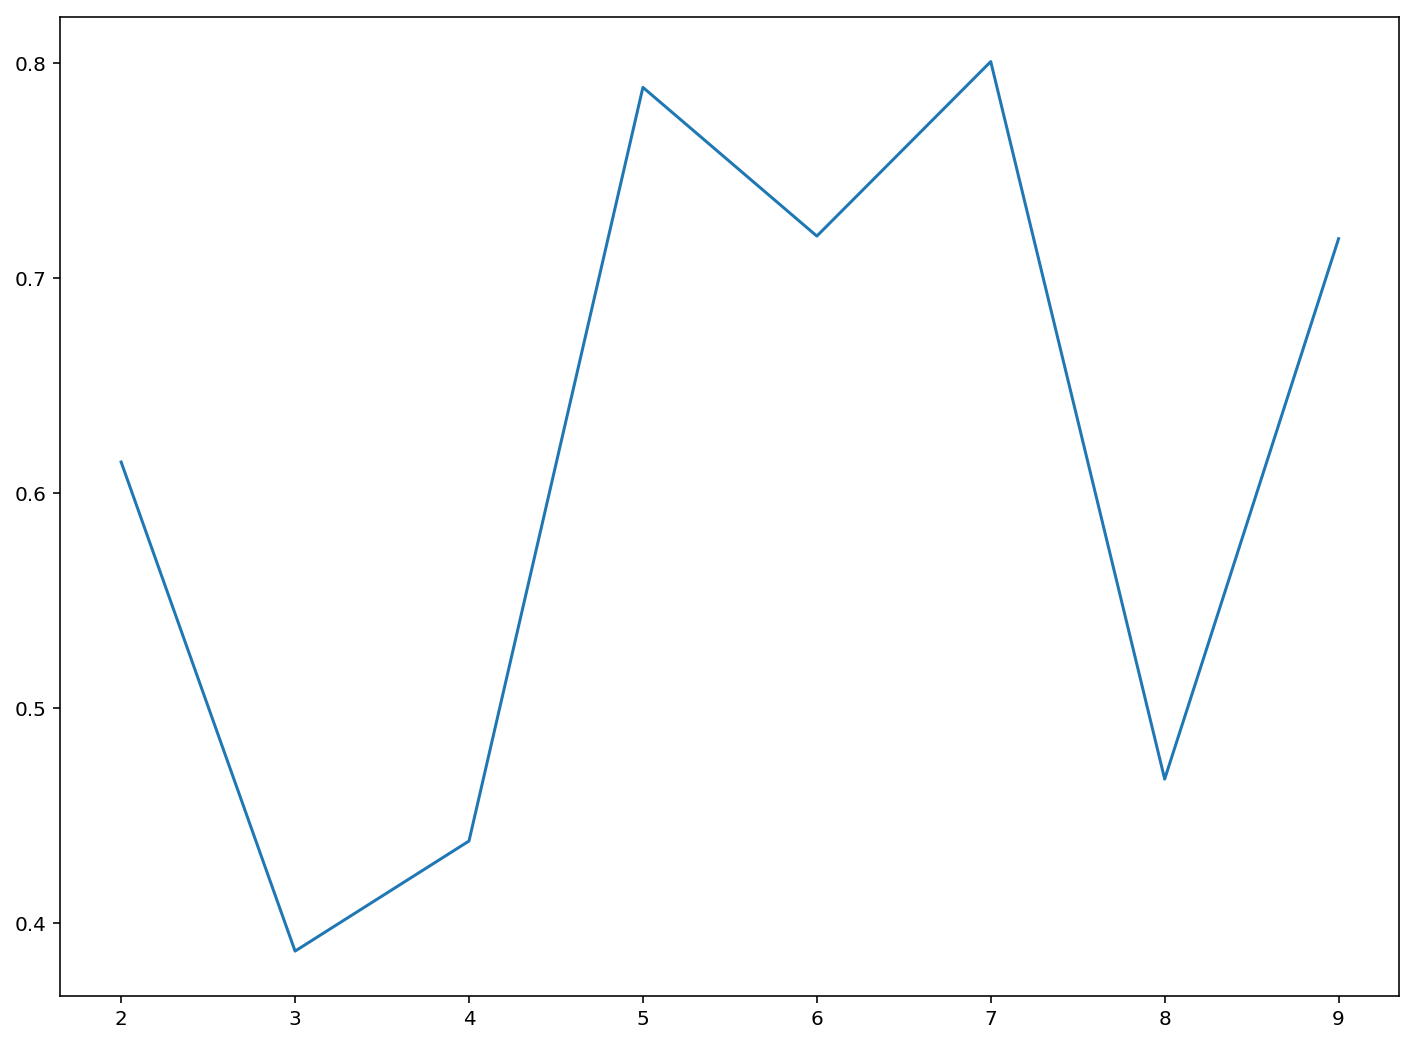

In [193]:
plt.plot(ks[1:-1], diff_r)

In [194]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [195]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_comment_class_true, )
    k_inertia.append(clf_kmeans.inertia_)

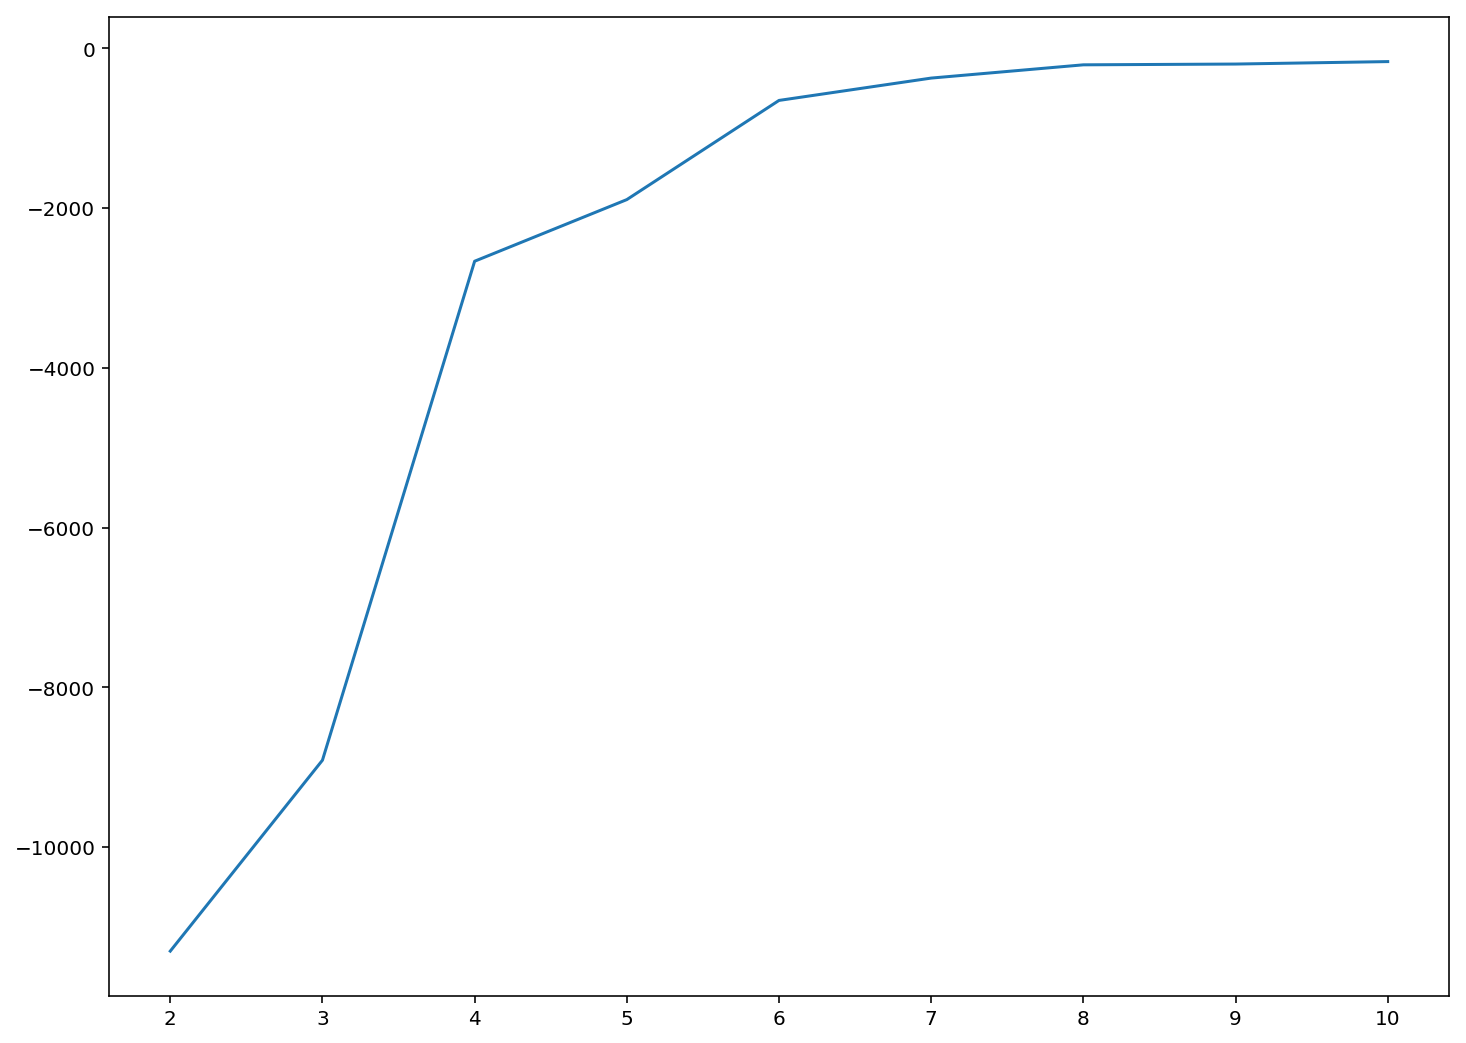

In [196]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

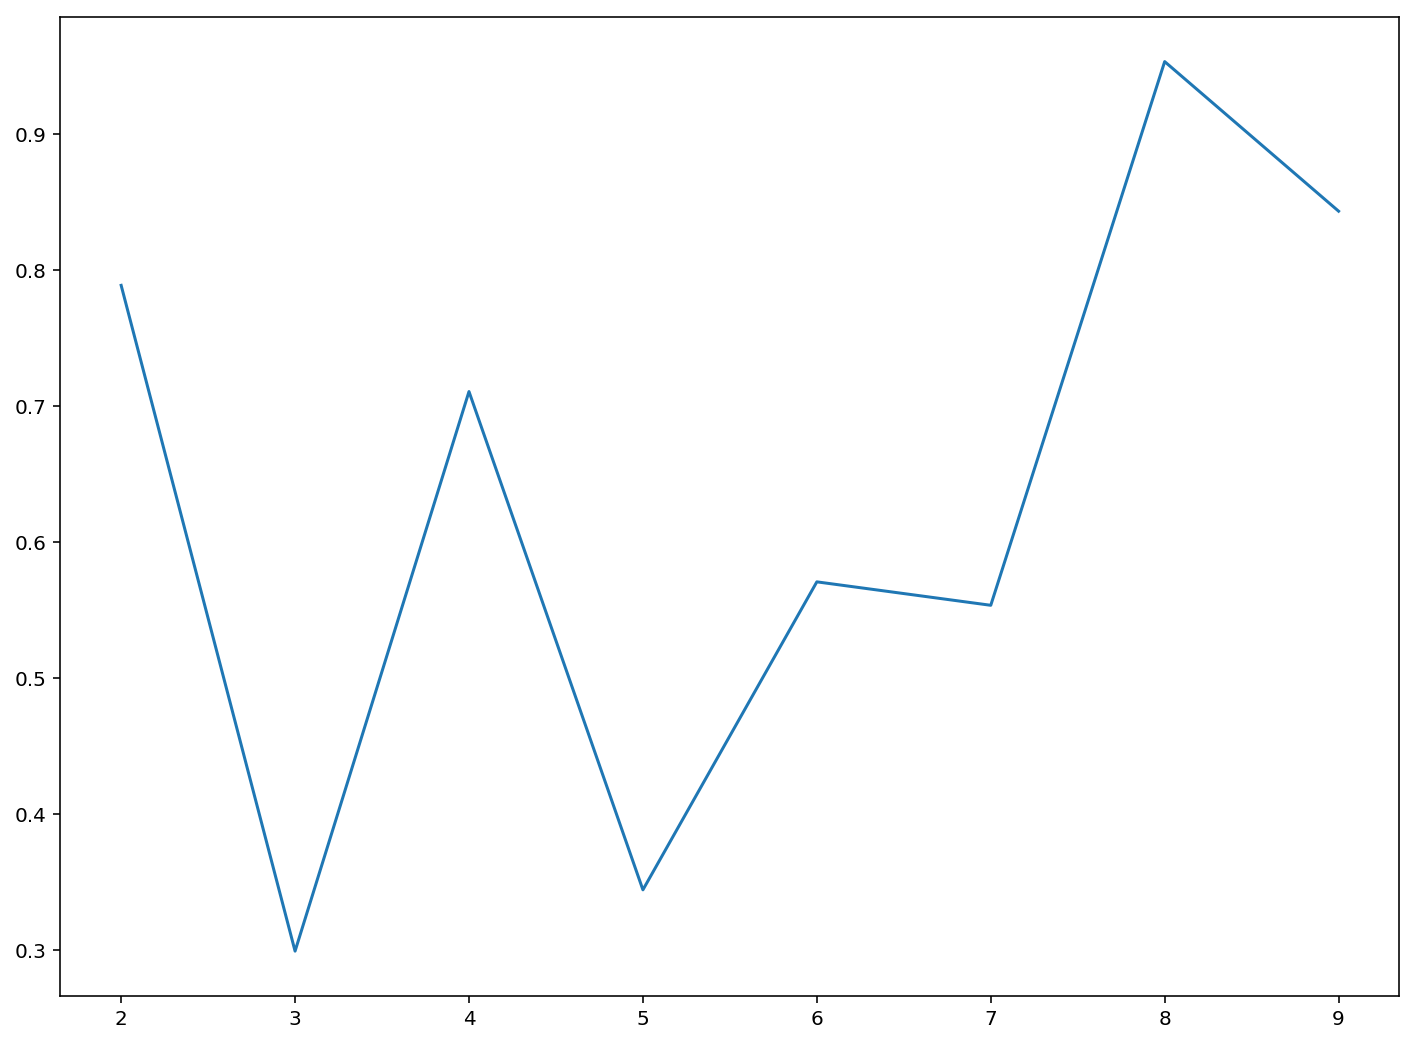

In [197]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [198]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [199]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_comment_class_false, )
    k_inertia.append(clf_kmeans.inertia_)

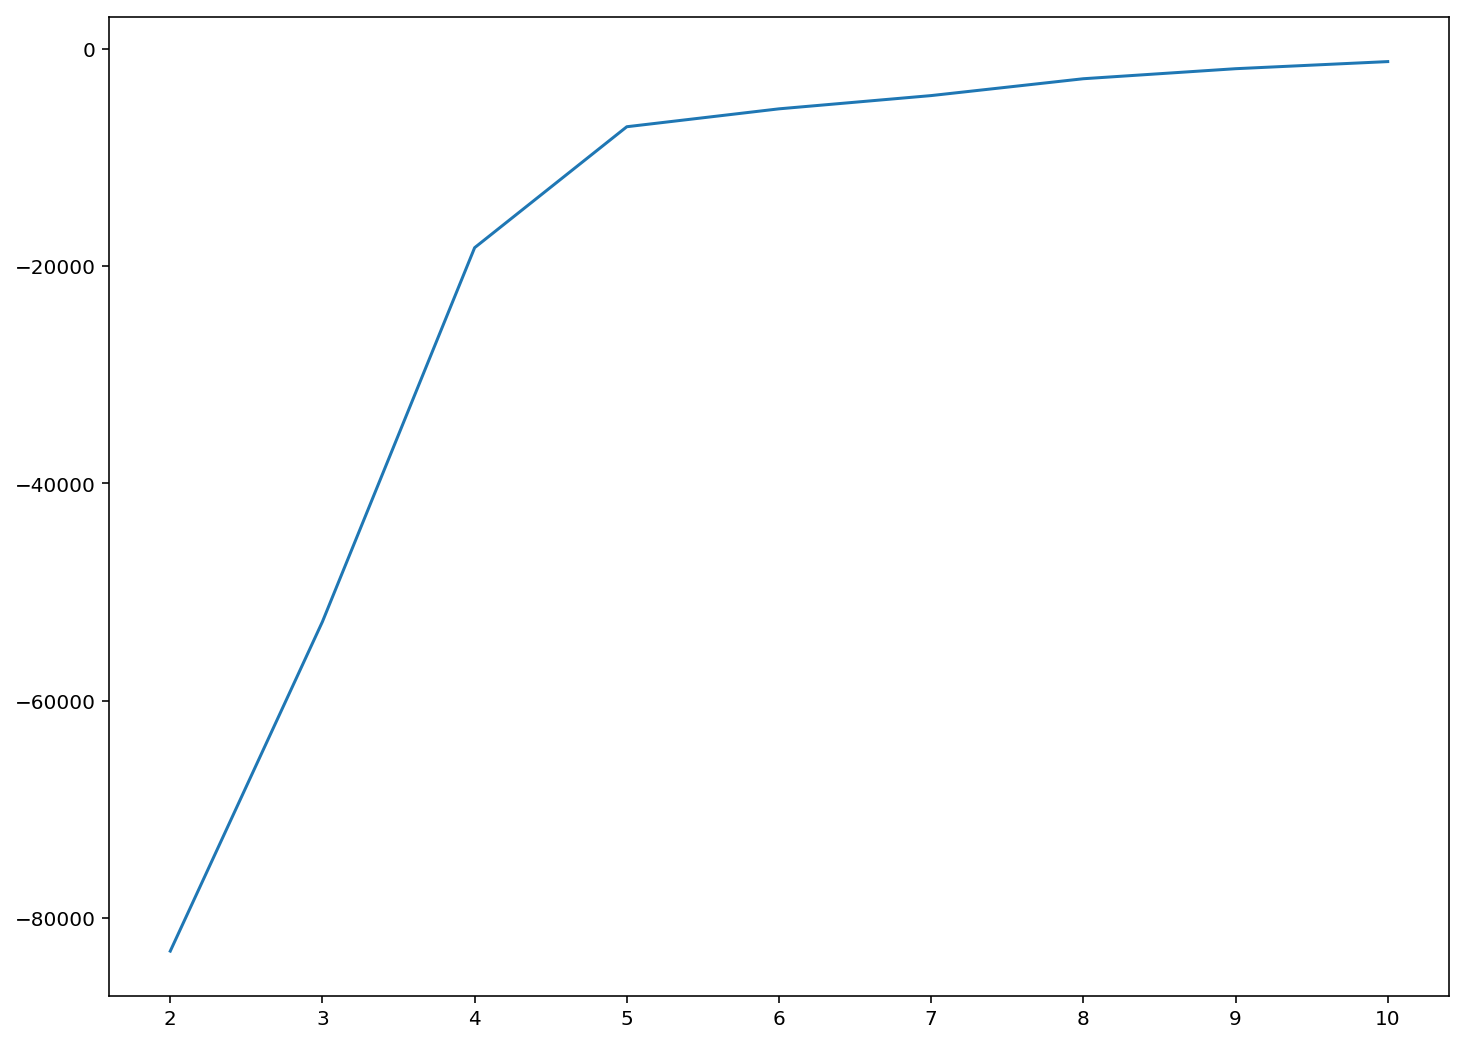

In [200]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

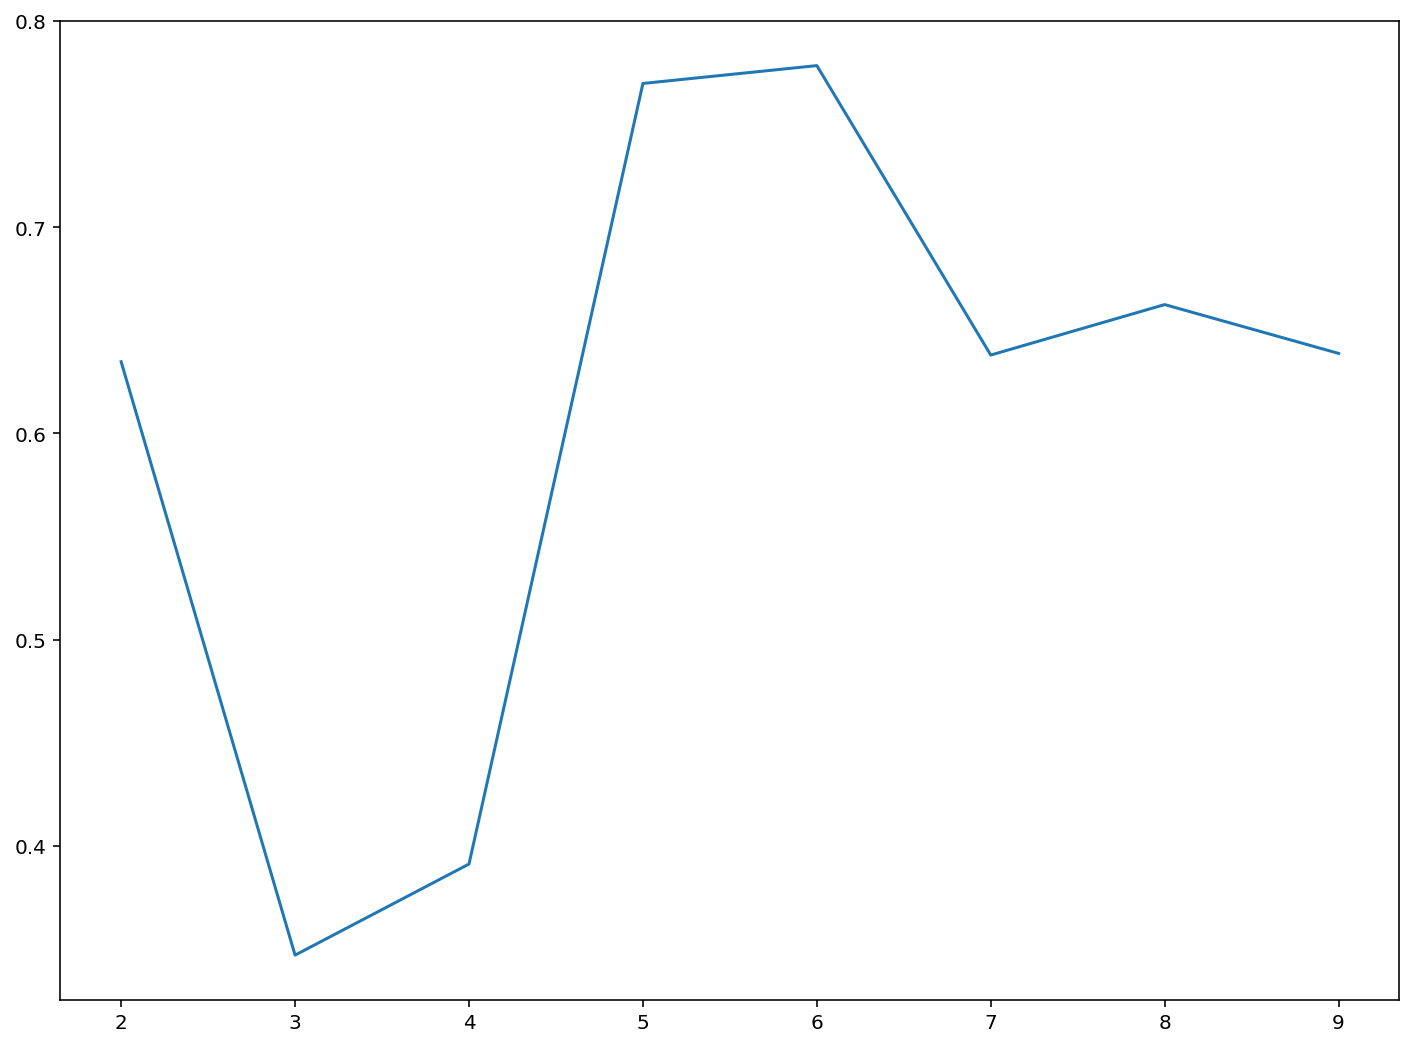

In [201]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [202]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3